<a href="https://colab.research.google.com/github/quantumseminar/textbook/blob/main/04gate/04superposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install -q qiskit qiskit-aer pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 58.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 41.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 9.7 MB/s eta 0:00:00


In [7]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

## 重ね合わせと測定
測定は0でも1でもない場合、計算結果を確定させて0か1にします。
Hゲートをかけてみます。

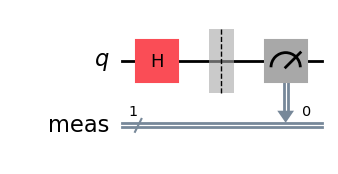

In [8]:
# 量子回路を準備
qc = QuantumCircuit(1)
qc.h(0)
qc.measure_all()

# 確認
qc.draw(output='mpl')

Counts: {'0': 519, '1': 505}


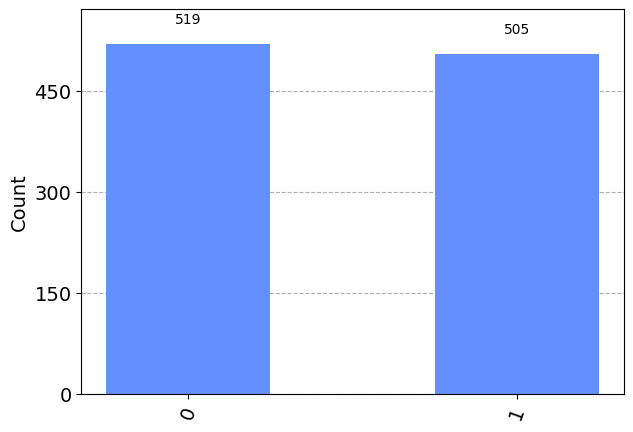

In [9]:
aersim = AerSimulator(method='statevector')

result = aersim.run(qc).result()
counts = result.get_counts(0)
print('Counts:', counts)

# 測定結果の頻度を棒グラフで表示
plot_histogram(counts)

0と1が半々で出ました。

## RYゲートで任意回転
RYゲートでちょっとだけ回転して測定してみます。


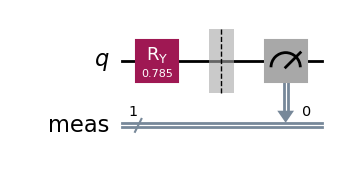

In [10]:
# 量子回路を準備
qc = QuantumCircuit(1)
qc.ry(0.25*3.14, 0)
qc.measure_all()

# 確認
qc.draw(output='mpl')

Counts: {'1': 154, '0': 870}


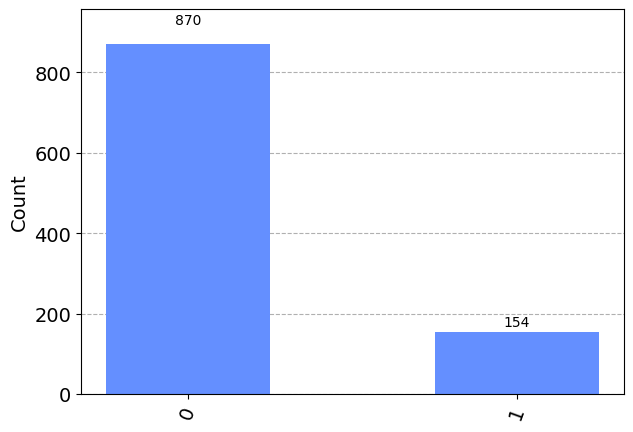

In [11]:
aersim = AerSimulator(method='statevector')

result = aersim.run(qc).result()
counts = result.get_counts(0)
print('Counts:', counts)

# 測定結果の頻度を棒グラフで表示
plot_histogram(counts)

変わりました。次は2量子ビットでやってみます。

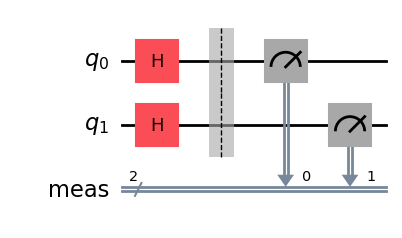

In [12]:
# 量子回路を準備
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.measure_all()

# 確認
qc.draw(output='mpl')

Counts: {'11': 262, '01': 266, '10': 226, '00': 270}


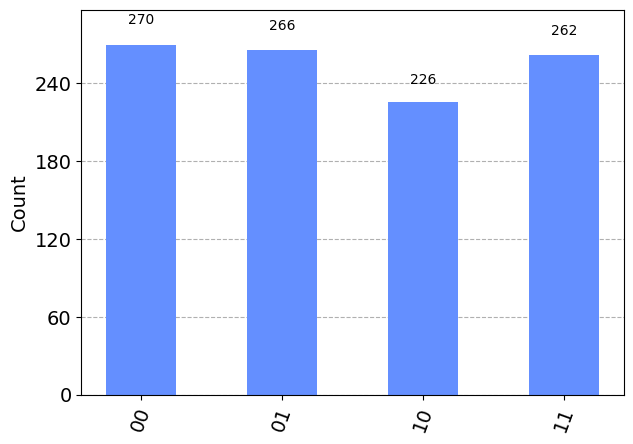

In [13]:
aersim = AerSimulator(method='statevector')

result = aersim.run(qc).result()
counts = result.get_counts(0)
print('Counts:', counts)

# 測定結果の頻度を棒グラフで表示
plot_histogram(counts)

00から11まで4通り出ました。次は3量子ビットでやってみます。


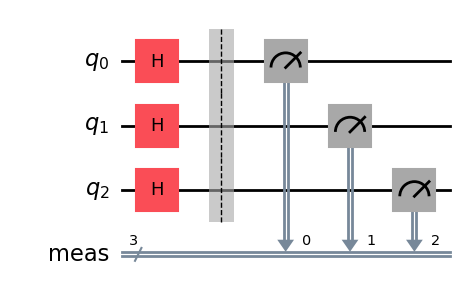

In [14]:
# 量子回路を準備
qc = QuantumCircuit(3)
qc.h(0)
qc.h(1)
qc.h(2)
qc.measure_all()

# 確認
qc.draw(output='mpl')

Counts: {'001': 134, '110': 131, '100': 131, '101': 138, '010': 124, '000': 125, '111': 129, '011': 112}


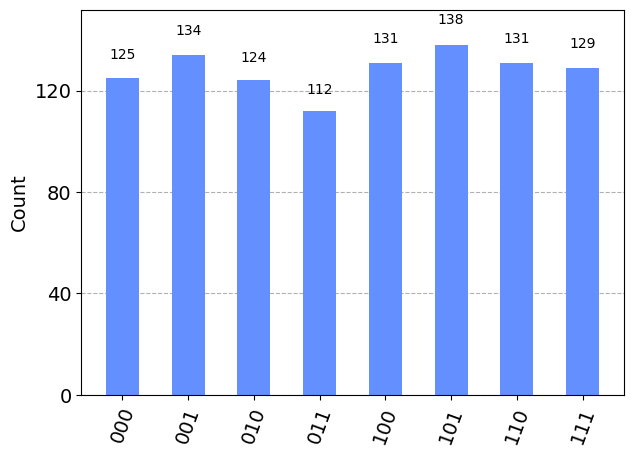

In [15]:
aersim = AerSimulator(method='statevector')

result = aersim.run(qc).result()
counts = result.get_counts(0)
print('Counts:', counts)

# 測定結果の頻度を棒グラフで表示
plot_histogram(counts)

8通り出ました。このようにどんどん増えてしまいます。次の講義では、量子もつれを使って増やさない方法をみます。